# Foundations of Finance

## Homework 1 Solutions

These Notebooks embed text and code in the same document. To evaluate a cell, press Shift+Enter.

Let's start by importing some packages that will aid us with our problems. We will be importing numpy along with some packages from math and scipy library.

In [1]:
# Comments within blocks of code start with a # sign and continue until the end of the line
import numpy as np
from math import log, sqrt, exp
from scipy import stats
import pandas_datareader as pd_dr
import pandas as pd

### Topic 1: Financial Markets

#### 1. You are among the OTC marketmakers in the stock of BioEngineering, Inc. and quote a bid of 102.25 and an ask of 102.50. Suppose that you have a zero inventory.

##### (a) On Day 1 you receive market buy orders for 10,000 shares and market sell orders for 4,000 shares. How much do you earn on the 4,000 shares that you bought and sold? What is the value of your inventory at the end of the day? 
(Hints: It is possible
to have negative inventory. Further, there is more than one correct way to value an
inventory, but please state what assumption your valuation is based on.)

You have sold 10,000 shares at the ask price of 102.50. You bought 4,000 shares at
a bid price 102.25. Thus, 6,000 shares are sold short (sold without already owning
the security). Your revenue from the 4,000 "round trip" purchase and sale produces a
profit equal to the bid minus the ask times the volume done. Hence, the profit on the
round trip trades is 0.25 x 4,000 = 1,000.
The value of your inventory is equal to the value of your short position of 6,000 shares.
Since there is both a bid and an ask price, this question can answered is various ways
depending on what you assume:
The "conservative" valuation is to value your position at the ask price of 102.50. Then,
you have a position of -615,000. This conservative valuation is useful because, if you
cover your short position by buying from another dealer at his ask price of 102.50,
you would have to pay 615,000. (Also, in this example it is the price for which you
sold the securities.)
The "aggressive" valuation is to value your position at the bid price of 102.25. Then,
you have a position of -613,500 (i.e. less negative than above). This value is implicitly
based on an expectation that some investors will come to you and sell you 6000 shares
at your current bid price.
Often, real-world market makers will value their inventory at the mid price, in this
case 102.375. Then, you have a position of -614,250.




In [2]:
bid = 102.25
ask = 102.50
market_buy = 10000
market_sell = 4000

In [3]:
profit = min(market_buy,market_sell)*(ask-bid) # The profit is only realized on the "round-trip" buy and sell orders
inventory = -market_buy+market_sell # Market buy orders reduce inventory and market sell orders increase it
value_inventory_ask = inventory*ask # The $ value of the inventory, valued at the ask (more conservative for negative inventory)
value_inventory_bid = inventory*bid # The $ value of the inventory, valued at the bid

In [4]:
profit

1000.0

In [5]:
inventory

-6000

In [6]:
value_inventory_ask

-615000.0

In [7]:
value_inventory_bid

-613500.0

##### (b) Before trading begins on Day 2 the company announces trial testing of a cure for acne in mice. The quoted bid and ask jump to 110.25 and 110.50, respectively.

During Day 2 you receive market sell orders for 8,000 shares and buy orders for 2,000
shares. What is your total profit or loss over the two-day period? What is the value
of your inventory at the end of Day 2?
You have bought 8,000 shares during Day 2 at 110.25 and sold 2,000 shares at 110.50.
On the 2,000 you bought and sold during the day you earn 2,000 x 0.25 = 500. You
also added 6,000 shares to your inventory at a price of 110.25. Since you were short
6,000 shares at 102.50 from yesterday's trading, your loss on these 6,000 shares is -7.75 x 6,000 = -46,500. Thus your total profit/loss over the two-day period is:

                               1,000+500-46,500 = -45,000.

Your inventory at the end of Day 2 is zero since
you purchased 6,000 shares that offset the 6,000 share short position at the end of Day
1.

In [8]:
day2_bid = 110.25
day2_ask = 110.5
day2_market_sell = 8000
day2_market_buy = 2000

In [9]:
day2_inventory = inventory-day2_market_buy+day2_market_sell ## The inventory after day 2

## The profit after day 2 is equal to the profit on day 1 plus the profit from round-trip trades on day 2 plus the profit on the
## sale/purchase of the day-1 inventory on day 2. If the day-1 inventory is negative, then it was sold at the day-1 ask and 
## bought back at the day-2 bid (this is the case in the question). If it is negative, then it was bought at the day-1 bid 
## and sold at the day-2 ask.
if inventory<0:
    day2_profit = profit+min(day2_market_buy,day2_market_sell)*(day2_ask-day2_bid)-inventory*(ask-day2_bid)
else:
    day2_profit = profit+min(day2_market_buy,day2_market_sell)*(day2_ask-day2_bid)+inventory*(day2_ask-bid)


In [10]:
day2_inventory

0

In [11]:
day2_profit

-45000.0

##### (c) What is a market maker's objective? Is there anything you could have done during Day 1, consistent with a market maker's objective, that would have improved your performance over the two-day period?

A marketmaker's objective is to earn the bid-ask spread, and not (necessarily) to
speculate on equilibrium price movements. The 6,000 share short position at the end
of Day 1 left you vulnerable to a jump in quoted prices. Perhaps you should have
increased the prices during Day 1 as you observed more buying than selling. Also,
you could have reduced your short inventory position by buying from other dealers at
102.50 as the market closed on Day 1. There are two factors that may have prevented
you from doing this: (1) Your expected profit of .25 on the 6,000 shares if market
prices remained unchanged at 102.25 (bid) and 102.50 (ask). (2) Unwillingness of
other dealers to accommodate your purchase of 6,000 shares at the 102.50 ask price.

### Topic 2: Performance Measures

#### 2. Suppose a 5-year zero-coupon Treasury bond with face value $1000 has a 5% yield (annually compounded).
##### (a) What price does this bond sell for?

In [12]:
fv = 1000                  #Face Value
r = 0.05                   #Rate of interest
t = 5                      #Time Period

In [13]:
pv = fv/(1+r)**t           #Formula for calculating the Present Value; "**" is the exponentiation operator.

In [14]:
pv                         #Calling out the value to print the final result.

783.5261664684588

We can solve the above problem with a single line of code using scipy package

In [15]:
#numpy.pv(rate, nper, pmt, fv=0.0, when='end')

# a future value, fv
# an interest rate compounded once per period, of which there are
# nper total number of periods
# a (fixed) payment, pmt, paid either
# at the beginning (when = {‘begin’, 1}) or the end (when = {‘end’, 0}) of each period


np.pv(0.05,5,0,1000)

-783.52616646845877

In financial terms, a negative sign before a cash flow indicates an outgoing cash flow and a positive or no sign indicates an incoming cash flow.



##### (b) Suppose another zero-coupon Treasury bond also has a 5% yield, but sells for $325.57. What is the maturity of this bond?

In [16]:
fv = 1000                  #Face Value
r = 0.05                   #Rate of interest
pv = 325.57                #Present Value

In [17]:
t = log(fv/pv)/log(1+r)

In [18]:
t

23.00008220496793

#### 3. Which of the following investments do you prefer?

##### (a) Purchase a zero-coupon bond, which pays 1000 in ten years, for a price of $550.

##### (b) Invest $550 for ten years in Chase at a guaranteed annual interest rate of 5.5%.

Solution:
You can go about this in two ways:

1. We can calculate the yield of the bond and compare it with the interest guaranteed from Chase. Whichever gives us higher returns will be preferred.

2. We can calculate the future value of our investment in Chase and compare it with the face value of our bond.

In [19]:
fv = 1000
t = 10
pv = 550

In [20]:
r = (fv/pv)**(1/t)-1

In [21]:
r

0.06160689621814597

The yield of the bond is 0.0616 or 6.16% which is greater than 5.5% yielded by investing in Chase. Therefore, the bond is a better investment.

In [22]:
r = 0.055
pv = 550
t = 10

In [23]:
fv = pv*(1+r)**t                 #The variable after '**' signifies the exponent

In [24]:
fv

939.4794520944758

the Chase deposit after 10 years will have grown to $939.48 which is lower than the face value of the bond

Using Scipy:

In [25]:
#numpy.rate(nper, pmt, pv, fv, when='end', guess=0.1, tol=1e-06, maxiter=100)[source]

np.rate(10,0,-550,1000)

0.061606896218165071

In [26]:
np.fv(0.055,10,0,-550)

939.47945209447585

** 4. Suppose you get for free one of following two securities: **

##### (a) an annuity that pays 10000 at the end of each of the next 6 years; or 
##### (b) a perpetuity that pays 10,000 forever, but it does not begin until 10 years from now (the first cash payment from this security is 11 years from today). 

#### Which security would you choose if the annual interest rate is 5%? Does your answer change if the intere3st rate is 10%? Explain why or why not.

To determine whether it is better to get for free (a) or (b), we must calculate which
security has the higher present value.

Cash flow (a) is a straightforward annuity whose present value can be calculated as follows: 

In [27]:
C = 10000
r = 0.05
t = 6

In [28]:
pv = C*(1-1/((1+r)**t))/r

In [29]:
pv

50756.92067267452

Cash Flow (b) is a perpetuity that begins 10 years from now. We can value it in two
parts. First, we know that a perpetuity has a value, P, given by: P = C/r

In [30]:
C=10000
r=0.05

In [31]:
P=C/r

In [32]:
P

200000.0

Thus, with C = 10000 and r = 0.05 the perpetuity is worth 200,000. But it is worth
200,000 ten years from now (one year before the first payment), not today. We can get the present value of 200,000
received with a 10 year delay by treating that sum as though it were a zero coupon
bond with a face value of 200,000 payable in 10 years. Hence,

In [33]:
fv = 200000
r = 0.05
t = 10

In [34]:
pv = fv/(1+r)**t
pv

122782.65070815184

In [35]:
pv = C/r-C*(1-1/((1+r)**10))/r
pv

122782.65070815182

We find that the present value of the
perpetuity beginning 10 years from now is 122,782. Hence, we prefer the perpetuity
because its present value of 122,782 is larger than the 50,757 present value of the
annuity in (a).

Similarly, when rate = 10%, calculating for both:

In [36]:
C = 10000
r = 0.1
t = 6

In [37]:
pv = C*((1/r)-1/(r*(1+r)**t))            #For Annuity

In [38]:
pv                                       #For Annuity

43552.60699462229

In [39]:
pv = C/r                                 #Present Value For Perpetuity 10 years from now

In [40]:
pv                                       #Present Value For Perpetuity 10 years from now

100000.0

Similarly, We can get the present value of 100,000 received with a 10 year delay by treating that sum as though it were a zero coupon
bond with a face value of $100,000 payable in 10 years.

In [41]:
fv = 100000
r = 0.1
t = 10

In [42]:
pv = fv/(1+r)**t                         #Present Value For Perpetuity at Day 0

In [43]:
pv                                       #Present Value For Perpetuity at Day 0

38554.32894295314

Thus at 10% we prefer the annuity in (a), with a present value of 43,552, to the
perpetuity, which is worth only $38,554.
This result stems from the fact that even though the perpetuity has infinite cash flows
compared with the annuity, those cash flows begin with a 10- year delay. At a 10%
interest rate the delayed cash 
flows are penalized very heavily.






** 5. Suppose a hedge fund manager earns 1% per trading day. There are 250 trading days
per year. Answer the following questions: **


** (a) What will be your annual return on $100 invested in her fund if she allows you to
reinvest in her fund the 1% you earn each day? **

Allowing you to reinvest at 1% per day means that you are earning compound interest
on your initial $100 investment. The formula for P growing to F for one year at a
compound rate r per annum is:
                             F = P(1+r/n)^n

where n is the number of compounding periods per year and hence r/n is the rate per
compounding period. We are given r/n = 1% per day and are asked to calculate the
annual yield. This is equivalent to asking for the effective annual rate.


In [44]:
r = .01
t = 250
pv = 100

In [45]:
F = pv*(1+r)**t

In [46]:
F

1203.2155768297464

In [47]:
EAR = (1+r)**t-1
print("EAR = "+"{:.2%}".format(EAR)); ## Converts to percentage with two decimals


EAR = 1103.22%


#### (b) What will be your annual return assuming she puts all of your daily earnings into a zero-interest- bearing checking account and pays you everything earned at the end of the year?

If the hedge fund manager insists on putting your daily 1% earnings into a zero-interest
bearing checking account, then you will earn only the daily rate (1%) multiplied by
the number of days, or, 1% * 250 = 250%

Notice that this is equivalent to the annual percentage rate (APR) calculation:
APR = periodic rate x n = 1% x 250

The value at the end of the year includes interest earnings plus original investment,
that is, 100+250=350.

In [48]:
F = pv*(1+r*t) # Without re-investment, there is no compounding of interest
F

350.0

In [49]:
APR = 250*r
print("APR = "+"{:.2%}".format(APR)); # Converts to percentage with two decimals

APR = 250.00%


#### (c) Can you summarize when it is proper to "annualize" using APR (annual percentage rate) versus EAR (eective annual rate)?

Whether you use APR or EAR to annualize a periodic rate depends upon the process
for reinvesting the proceeds of your investment. If you can reinvest at the periodic
rate (as in (a)) then EAR is appropriate. If the reinvestment rate is zero (as in (b))
then APR is appropriate. Since the reinvestment rate is rarely zero, the APR usually
understates the annual rate.

#### 6. Here are some alternative investments you are considering for one year. (i) Bank A promises to pay 8% on your deposit compounded annually. (ii) Bank B promises to pay 8% on your deposit compounded daily. Compare the effective annual rate (EAR) on these investments.
(i) EAR = .08


In [50]:
r = .08
m = 365 # Compounded daily


In [51]:
EAR = ((1+r/m)**m)-1
print("EAR = "+"{:.2%}".format(EAR)); # Converts to percentage with two decimals

EAR = 8.33%


In general, the greater the compounding frequency, the higher the EAR. This is because
with more frequent compounding, you earn more interest on interest.

#### 7. (a) Suppose that you have purchased a 3-year zero-coupon bond with face value of 1000 and a price of 850. If you hold the bond to maturity, what is your annual rate of return?

In [52]:
pv = 850
fv = 1000
t  = 3

In [53]:
r = (fv/pv)**(1/t)-1
print("r = "+"{:.2%}".format(r)); # Converts to percentage with two decimals

r = 5.57%


In [54]:
np.rate(3,0,-850,1000)        # Using Scipy

0.055667191978000838

#### (b) Now suppose you have purchased a 3-year bond with face value of 1000, a 7% annual coupon, and a price of 975. Assuming that you hold the bond to maturity, is the IRR greater or less than the return on the bond in part (a)?

Recall that the IRR is defined as the interest rate that makes the present value of the
payments equal to the price. Hence, the IRR (annual compounding) solves : 

                           975 = 70/(1 + IRR) + 70/(1 + IRR)^2 + 1070/(1 + IRR)^3 

In [55]:
round(np.irr([-975, 70, 70, 1070, 20]), 3)        #Using Scipy

0.085

Another way to go about it is to insert the IRR value calculated in (a), to find out pv, and compare those values.

#### 8. Download the monthly S&P 500 prices from January 1950 until today http://finance.yahoo.com/ (click Market Data, click S&P 500, click Historical Prices, click Monthly, click Get Prices, click Download to Spreadsheet at the bottom of the page).

#### (a) What is your best estimate for next month’s return?

In [59]:
# If you get an error, try executing this cell again after a few seconds:
dsp500 = pd_dr.DataReader(name='^GSPC',data_source='yahoo', start='1950-1-1') # ^GSPC is the ticker for the S&P 500
resample = dsp500.resample('M') # Make an extra column for the month
sp500 = resample.last() # Keep the last observation in each month so we can calculate monthly returns
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-31,2415.629883,2415.989990,2403.590088,2411.800049,2411.800049,4516110000
2017-06-30,2429.199951,2432.709961,2421.649902,2423.409912,2423.409912,3361590000
2017-07-31,2475.939941,2477.959961,2468.530029,2470.300049,2470.300049,3469210000
2017-08-31,2462.649902,2475.010010,2462.649902,2471.649902,2471.649902,3348110000
2017-09-30,2507.159912,2507.159912,2499.000000,2500.600098,2500.600098,1804662900


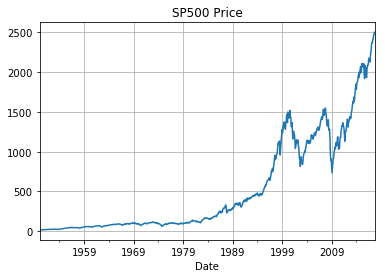

In [60]:
%matplotlib inline
sp500['Close'].plot(grid=True,title='SP500 Price')

In [61]:
sp500['Return'] = sp500['Adj Close'] / sp500['Adj Close'].shift(1)-1 # Calculate the monthly returns (HPR)
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-05-31,2415.629883,2415.989990,2403.590088,2411.800049,2411.800049,4516110000,0.011576
2017-06-30,2429.199951,2432.709961,2421.649902,2423.409912,2423.409912,3361590000,0.004814
2017-07-31,2475.939941,2477.959961,2468.530029,2470.300049,2470.300049,3469210000,0.019349
2017-08-31,2462.649902,2475.010010,2462.649902,2471.649902,2471.649902,3348110000,0.000546
2017-09-30,2507.159912,2507.159912,2499.000000,2500.600098,2500.600098,1804662900,0.011713


In [62]:
ravg = np.mean(sp500['Return']) # Calculate the average monthly return
print("Average monthly return = "+"{:.2%}".format(ravg)); # Converts to percentage with two decimals

Average monthly return = 0.70%


#### (b) What would have been your annualized HPR if you invested as of the start of the index?

We can calculate the annualized HPR in two ways:

1) As the geometric average of the monthly returns

2) By first calculating the future value of $1 invested in 1950

In [63]:
GrossReturn = 1+sp500['Return']
GrossReturn = GrossReturn[np.isfinite(GrossReturn)]
r=stats.gmean(GrossReturn)**12-1 # The geometric average return. The 12th power converts from monthly to annualized
print("Annualized HPR = "+"{:.2%}".format(r)); # Converts to percentage with two decimals

Annualized HPR = 7.65%


In [64]:
FV = np.cumprod(GrossReturn) # Multiplying the gross returns gives the accumulated value of investing $1 in the S&P 500
T  = len(FV)/12 # The number of years for which we invested
annHPR = FV.iloc[-1]**(1/T)-1 # The annualized HPR
print("Annualized HPR = "+"{:.2%}".format(r)); # Converts to percentage with two decimals

Annualized HPR = 7.65%


#### (c)  In what month occurred the lowest monthly return? What happened?

In [65]:
r=sp500['Return'].min() #Min Return
idx = np.where(sp500['Return']==r)
sp500.iloc[idx]

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1987-10-31,244.770004,254.039993,244.770004,251.789993,251.789993,303400000,-0.21763


In [66]:
print("Lowest monthly return = "+"{:.2%}".format(r)); # Converts to percentage with two decimals

Lowest monthly return = -21.76%


The worst month for the S&P 500 was October 1987 with a return of -21:763%. This was the famous crash of 1987, which was triggered on October 19, 1987 (known as Black Monday). See e.g.: [Black Monday](http://en.wikipedia.org/wiki/BlackMonday_(1987))